In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [59]:
df = pd.read_excel('input_data.xlsx', index_col=0)
df

,contract_num,product_name,client_id,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd
0,ТТЕ7227715*****,Страхование путешественников,10161870404,Действует,Российский рубль,10,Беларусь,20,M,1096,2000000,NaN,12.41768,22660.000080,NaN
1,ТТЕ7227715*****,Страхование путешественников,1017159879,Действует,Российский рубль,7,Индонезия,55,M,1918,5000000,NaN,21.73094,56650.000199,NaN
2,БАДАМСТЕ55*****,Страхование путешественников,10161883357,Действует,Российский рубль,10,Беларусь,61,F,1096,2000000,NaN,12.41768,22660.000080,NaN
3,ТТЕ7227715*****,Страхование путешественников,100766461,Действует,Российский рубль,14,Грузия,25,M,1534,2000000,NaN,17.38022,22660.000080,NaN
4,ТТЕ7227715*****,Страхование путешественников,10171604758,Действует,Российский рубль,7,Аргентина,33,M,1918,5000000,NaN,21.73094,56650.000199,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,ДСЖ-5/1539*****,Страхование путешественников,100649013,Действует,Российский рубль,15,Турция,22,F,2466,3000000,NaN,27.93978,33990.000119,NaN
3707,ТТЕ7227778*****,Страхование путешественников,1017151314,Действует,Российский рубль,7,Индонезия,33,M,1918,5000000,NaN,21.73094,56650.000199,NaN
3708,БТАСЕ275 -*****,Страхование путешественников,1006491844,Действует,Российский рубль,15,Турция,43,M,2466,3000000,NaN,27.93978,33990.000119,NaN
3709,ТТЕ7227778*****,Страхование путешественников,1006513037,Действует,Российский рубль,30,Турция,29,M,4932,3000000,NaN,55.87956,33990.000119,NaN


Посмотрим, в каких колонках встречаются пропуски.

In [3]:
df.shape[0], df.dropna().shape[0]

(3711, 43)

In [4]:
df.isna().sum()

contract_num               0
product_name               0
client_id                  0
contract_status            0
currency_name              0
duration                   0
country                    0
age                        0
sex                        0
price                      0
insurance_amount           0
loss_payout_amt         3666
price_usd                120
insurance_amount_usd     120
loss_payout_amt_usd     3668
dtype: int64

Нет стоимости в USD и нет страховой суммы в USD пропущено 120 значений.
значения loss_payout_amt        loss_payout_amt_usd      пропущены, так как, скорее всего не было выплат по страховкам. 

In [5]:
for column in df.columns:
    print(column)
    print(df[column].unique())

contract_num
['ТТЕ7227715*****' 'БАДАМСТЕ55*****' 'ДСЖ-5/2771*****' 'ТТЕ7227778*****'
 'БАУБМСТЕ37*****' 'ЦТТЕЕ774 7*****' 'БТАСЕ273 -*****' 'ДСЖ-5/1539*****'
 'ЕТЕ7215377*****' 'ТБГО5Е7 № *****' 'ТТЕ7227779*****' 'БАТАМСТЕ35*****'
 'ТМГО5Е7 № *****' 'БАТАМСТЕ55*****' 'ТБЕТМСТЕ67*****' 'БТАСЕ27153*****'
 'ТМГФ5Е7 № *****' 'ТББТМСЛЕ47*****' 'БАГАМПТЕ55*****' 'БТАСЕ275 -*****'
 'БАУЗМСТЕ57*****' 'БТАСЕ276 -*****' 'БАЖАМСТЕ35*****' 'ТБАТМСЛЕ47*****'
 'БТАСЕ277 -*****' 'ИТЕ7 67777*****' 'ТАБТМСЛЕ67*****' 'БАЖАМСТЕ55*****'
 'ТМГФ5Е3 № *****' 'ТБГО7Д7 № *****' 'ТМГ1535Е7 *****' 'БТАСЕ476 -*****'
 'ТБГ1537Д7 *****' 'ТБГ1535Е7 *****' 'ТТЕ7227777*****' 'БАДАМСТЕ35*****'
 'БАЗАМПТЕ57*****' 'БТАСЕ775 -*****' 'БАЛАМСТЕ55*****' 'БАЕАМСТЕ35*****'
 'БТАСЕ272 -*****' 'БАЛАМСТЕ56*****' 'БАПАОСТЕ35*****' 'ТМГЩ5Е3 № *****'
 'ТМБЕ575 № *****' 'ТМБЕ579 № *****' 'БАМАМСТЕ35*****' 'ТББТМСЛЕ67*****'
 'ИТЕ7 67771*****' 'БТАСЕ475 -*****' 'ТМБЕ573 № *****' 'ТМГЩ5Е7 № *****'
 'БАЖАМСТЕ36*****' 'БАПАМСТЕ35*****' '

In [6]:
rows_with_missing_usd_values = df[df['price_usd'].isnull() & df['price'].isnull()]
rows_with_missing_usd_values

,contract_num,product_name,client_id,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd


In [7]:
rows_with_missing_usd_values = df[df['loss_payout_amt_usd'].isnull() | df['loss_payout_amt_usd'].isnull()]
rows_with_missing_usd_values

,contract_num,product_name,client_id,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd
0,ТТЕ7227715*****,Страхование путешественников,10161870404,Действует,Российский рубль,10,Беларусь,20,M,1096,2000000,NaN,12.41768,22660.000080,NaN
1,ТТЕ7227715*****,Страхование путешественников,1017159879,Действует,Российский рубль,7,Индонезия,55,M,1918,5000000,NaN,21.73094,56650.000199,NaN
2,БАДАМСТЕ55*****,Страхование путешественников,10161883357,Действует,Российский рубль,10,Беларусь,61,F,1096,2000000,NaN,12.41768,22660.000080,NaN
3,ТТЕ7227715*****,Страхование путешественников,100766461,Действует,Российский рубль,14,Грузия,25,M,1534,2000000,NaN,17.38022,22660.000080,NaN
4,ТТЕ7227715*****,Страхование путешественников,10171604758,Действует,Российский рубль,7,Аргентина,33,M,1918,5000000,NaN,21.73094,56650.000199,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,ДСЖ-5/1539*****,Страхование путешественников,100649013,Действует,Российский рубль,15,Турция,22,F,2466,3000000,NaN,27.93978,33990.000119,NaN
3707,ТТЕ7227778*****,Страхование путешественников,1017151314,Действует,Российский рубль,7,Индонезия,33,M,1918,5000000,NaN,21.73094,56650.000199,NaN
3708,БТАСЕ275 -*****,Страхование путешественников,1006491844,Действует,Российский рубль,15,Турция,43,M,2466,3000000,NaN,27.93978,33990.000119,NaN
3709,ТТЕ7227778*****,Страхование путешественников,1006513037,Действует,Российский рубль,30,Турция,29,M,4932,3000000,NaN,55.87956,33990.000119,NaN


In [60]:
#Заполняем пропуски нулями
df['loss_payout_amt']=df['loss_payout_amt'].fillna(value=0)

In [61]:
df['loss_payout_amt'].unique()

array([      0.,  100000.,   50000.,   20000.,   30000.,   70000.,
         60000.,  300000.,   40000.,  150000.,   90000., 1000000.,
       1500000.,  200000.,  250000.,   80000.,  800000.,  500000.,
        700000., 1300000.])

In [62]:
#Заполняем пропуски нулями, так как здесь на 2 значения больше пропущено, то заполняем на основе рублевых значений переведенных в usd
df['loss_payout_amt_usd'] = df['loss_payout_amt'].apply(lambda x: x/88.2612533098)
df['loss_payout_amt_usd']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3706    0.0
3707    0.0
3708    0.0
3709    0.0
3710    0.0
Name: loss_payout_amt_usd, Length: 3711, dtype: float64

In [63]:
df['loss_payout_amt_usd'].unique()

array([    0. ,  1133. ,   566.5,   226.6,   339.9,   793.1,   679.8,
        3399. ,   453.2,  1699.5,  1019.7, 11330. , 16995. ,  2266. ,
        2832.5,   906.4,  9064. ,  5665. ,  7931. , 14729. ])

Соответственно заполним пропуски в стоимости в USD и страховой суммы в USD на основе стоимости в рублях

In [64]:
df['price_usd'] = df['price'].apply(lambda x: x/88.2612533098)
df['price_usd']

0       12.41768
1       21.73094
2       12.41768
3       17.38022
4       21.73094
          ...   
3706    27.93978
3707    21.73094
3708    27.93978
3709    55.87956
3710    21.73094
Name: price_usd, Length: 3711, dtype: float64

In [65]:
df['insurance_amount_usd'] = df['insurance_amount'].apply(lambda x: x/88.2612533098)
df['insurance_amount_usd']

0       22660.0
1       56650.0
2       22660.0
3       22660.0
4       56650.0
         ...   
3706    33990.0
3707    56650.0
3708    33990.0
3709    33990.0
3710    56650.0
Name: insurance_amount_usd, Length: 3711, dtype: float64

Потеряли слишком много информации. Значит, будем специально обрабатывать пропуски.

Колонки какого типа содержатся в датасете?

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3711 entries, 0 to 3710
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   contract_num          3711 non-null   object 
 1   product_name          3711 non-null   object 
 2   client_id             3711 non-null   int64  
 3   contract_status       3711 non-null   object 
 4   currency_name         3711 non-null   object 
 5   duration              3711 non-null   int64  
 6   country               3711 non-null   object 
 7   age                   3711 non-null   int64  
 8   sex                   3711 non-null   object 
 9   price                 3711 non-null   int64  
 10  insurance_amount      3711 non-null   int64  
 11  loss_payout_amt       3711 non-null   float64
 12  price_usd             3711 non-null   float64
 13  insurance_amount_usd  3711 non-null   float64
 14  loss_payout_amt_usd   3711 non-null   float64
dtypes: float64(4), int64(5), o

#### Пропуски обработаны

In [66]:
df['currency_name'] = LabelEncoder().fit_transform(df['currency_name'])
df['contract_status'] = LabelEncoder().fit_transform(df['contract_status'])
df['sex'] = LabelEncoder().fit_transform(df['sex'])

In [22]:
df['currency_name'].unique()

array([1, 0])

In [24]:
df['contract_status'].unique()

array([0, 1])

In [26]:
df['sex'].unique()

array([1, 0])

In [67]:
data = df[['country']]
ohe = OneHotEncoder(sparse=False)
ohe_transform = ohe.fit_transform(data) #Применяем преобразование для датафрейма с категориальными переменными и сохраняем в новую переменную.
ohe.get_feature_names_out()
df[ohe.get_feature_names_out()] = ohe_transform #Добавляем в датафрейм получившиеся новые признаки
df.head()

d:\Program files\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,contract_num,product_name,client_id,contract_status,currency_name,duration,country,age,sex,price,...,country_Иран,country_Казахстан,country_Канада,country_ОАЭ,country_США,country_Сирия,country_Таиланд,country_Турция,country_Узбекистан,country_Франция
0,ТТЕ7227715*****,Страхование путешественников,10161870404,0,1,10,Беларусь,20,1,1096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ТТЕ7227715*****,Страхование путешественников,1017159879,0,1,7,Индонезия,55,1,1918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,БАДАМСТЕ55*****,Страхование путешественников,10161883357,0,1,10,Беларусь,61,0,1096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ТТЕ7227715*****,Страхование путешественников,100766461,0,1,14,Грузия,25,1,1534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ТТЕ7227715*****,Страхование путешественников,10171604758,0,1,7,Аргентина,33,1,1918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
df.columns

Index(['contract_num', 'product_name', 'client_id', 'contract_status',
       'currency_name', 'duration', 'country', 'age', 'sex', 'price',
       'insurance_amount', 'loss_payout_amt', 'price_usd',
       'insurance_amount_usd', 'loss_payout_amt_usd', 'country_Азербайджан',
       'country_Аргентина', 'country_Армения', 'country_Беларусь',
       'country_Болгария', 'country_Великобритания', 'country_Германия',
       'country_Грузия', 'country_Египет', 'country_Индонезия', 'country_Иран',
       'country_Казахстан', 'country_Канада', 'country_ОАЭ', 'country_США',
       'country_Сирия', 'country_Таиланд', 'country_Турция',
       'country_Узбекистан', 'country_Франция'],
      dtype='object')

In [70]:
# количественные переменные
quant = ['duration', 'age', 'price',
       'insurance_amount', 'loss_payout_amt', 'price_usd',
       'insurance_amount_usd', 'loss_payout_amt_usd']
df[quant].quantile(0.997)

duration                    365.00
age                          84.74
price                     60000.00
insurance_amount        5000000.00
loss_payout_amt          150000.00
price_usd                   679.80
insurance_amount_usd      56650.00
loss_payout_amt_usd        1699.50
Name: 0.997, dtype: float64

In [71]:
df[quant].quantile(0.95)

duration                3.000000e+01
age                     5.750000e+01
price                   7.123000e+03
insurance_amount        5.000000e+06
loss_payout_amt         0.000000e+00
price_usd               8.070359e+01
insurance_amount_usd    5.665000e+04
loss_payout_amt_usd     0.000000e+00
Name: 0.95, dtype: float64

In [72]:
df[quant].quantile(0.68)

duration                1.400000e+01
age                     4.400000e+01
price                   3.836000e+03
insurance_amount        5.000000e+06
loss_payout_amt         0.000000e+00
price_usd               4.346188e+01
insurance_amount_usd    5.665000e+04
loss_payout_amt_usd     0.000000e+00
Name: 0.68, dtype: float64

# Обработка аномалий

Есть как категориальные переменные, так и числовые. Будем обрабатывать их отдельно.

In [80]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [82]:
clf = LocalOutlierFactor(n_neighbors=5)
pred = clf.fit_predict(df[quant])

In [83]:
df[quant][pred == -1].shape

(442, 8)

In [88]:
df[quant][pred == -1].mean() - df[quant][pred == 1].mean()

duration                     7.496389
age                          4.579955
price                     1526.733218
insurance_amount        239573.866114
loss_payout_amt           4973.769775
price_usd                   17.297887
insurance_amount_usd      2714.371903
loss_payout_amt_usd         56.352812
dtype: float64

In [89]:
df[quant][pred == -1].mean() - df[quant].mean()

duration                     6.603529
age                          4.034458
price                     1344.891105
insurance_amount        211039.333960
loss_payout_amt           4381.367123
price_usd                   15.237616
insurance_amount_usd      2391.075654
loss_payout_amt_usd         49.640890
dtype: float64

In [105]:
df[pred == -1]

,contract_num,product_name,client_id,contract_status,currency_name,duration,country,age,sex,price,...,country_Иран,country_Казахстан,country_Канада,country_ОАЭ,country_США,country_Сирия,country_Таиланд,country_Турция,country_Узбекистан,country_Франция
5,ДСЖ-5/2771*****,Страхование путешественников,100651616,0,1,30,Турция,33,0,4932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,ТТЕ7227715*****,Страхование путешественников,1006516184,0,1,30,Турция,38,1,4932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12,ЕТЕ7215377*****,Страхование путешественников,1017164518,0,1,7,Индонезия,56,0,1918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,ТБГО5Е7 № *****,Страхование путешественников,100654779,0,1,30,Турция,40,0,4932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15,ДСЖ-5/1539*****,Страхование путешественников,100655341,0,1,30,Турция,31,0,4932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3692,ТТЕ7227715*****,Страхование путешественников,100616069,0,1,15,Турция,45,1,2466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3694,ТТЕ7227778*****,Страхование путешественников,100616448,0,1,15,Турция,33,1,2466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3698,БТАСЕ277 -*****,Страхование путешественников,100634083,0,1,15,Турция,43,1,2466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3708,БТАСЕ275 -*****,Страхование путешественников,1006491844,0,1,15,Турция,43,1,2466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_fin = df.drop(columns = ['contract_num', 'product_name', 'client_id','country'])
df_fin['ouliers'] = pred
df_fin

In [107]:
df_fin = df_fin.drop(columns='country')
df_fin

,contract_status,currency_name,duration,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,...,country_Казахстан,country_Канада,country_ОАЭ,country_США,country_Сирия,country_Таиланд,country_Турция,country_Узбекистан,country_Франция,ouliers
0,0,1,10,20,1,1096,2000000,0.0,12.41768,22660.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0,1,7,55,1,1918,5000000,0.0,21.73094,56650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0,1,10,61,0,1096,2000000,0.0,12.41768,22660.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0,1,14,25,1,1534,2000000,0.0,17.38022,22660.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0,1,7,33,1,1918,5000000,0.0,21.73094,56650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,0,1,15,22,0,2466,3000000,0.0,27.93978,33990.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3707,0,1,7,33,1,1918,5000000,0.0,21.73094,56650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3708,0,1,15,43,1,2466,3000000,0.0,27.93978,33990.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1
3709,0,1,30,29,1,4932,3000000,0.0,55.87956,33990.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1


In [108]:
df_fin.to_excel('df_fin.xlsx')

In [84]:
clf = IsolationForest()
pred_if = clf.fit_predict(df[quant])

In [85]:
df[quant][pred_if == -1].shape

(714, 8)

In [90]:
df[quant][pred_if == -1].mean() - df[quant][pred_if == 1].mean()

duration                    60.304278
age                          3.330895
price                     9138.832823
insurance_amount       -484347.372583
loss_payout_amt          14033.613445
price_usd                  103.542976
insurance_amount_usd     -5487.655731
loss_payout_amt_usd        159.000840
dtype: float64

In [91]:
df[quant][pred_if == -1].mean() - df[quant].mean()

duration                    48.701676
age                          2.690028
price                     7380.512522
insurance_amount       -391158.468238
loss_payout_amt          11333.532605
price_usd                   83.621207
insurance_amount_usd     -4431.825445
loss_payout_amt_usd        128.408924
dtype: float64

In [97]:
df[quant][pred_if == -1]

,duration,age,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd
5,30,33,4932,3000000,0.0,55.87956,33990.0,0.0
6,30,38,4932,3000000,0.0,55.87956,33990.0,0.0
8,30,41,4932,3000000,0.0,55.87956,33990.0,0.0
12,7,56,1918,5000000,0.0,21.73094,56650.0,0.0
13,30,40,4932,3000000,0.0,55.87956,33990.0,0.0
...,...,...,...,...,...,...,...,...
3606,14,70,1534,2000000,0.0,17.38022,22660.0,0.0
3645,7,56,1918,5000000,0.0,21.73094,56650.0,0.0
3663,14,67,1534,2000000,0.0,17.38022,22660.0,0.0
3670,7,22,1918,5000000,0.0,21.73094,56650.0,0.0


In [86]:
clf = OneClassSVM(gamma='auto', max_iter=1)
pred_svm = clf.fit_predict(df[quant])

d:\Program files\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [87]:
# такой способ не подходит, все данные определяет в выбросы
df[quant][pred_svm == -1].shape

(3352, 8)

In [92]:
df[quant][pred_svm == -1].mean() - df[quant][pred_svm == 1].mean()

duration                1.563276e+01
age                     4.897175e+00
price                   3.400955e+03
insurance_amount        1.435024e+06
loss_payout_amt         2.989260e+03
price_usd               3.853282e+01
insurance_amount_usd    1.625882e+04
loss_payout_amt_usd     3.386832e+01
dtype: float64

In [93]:
df[quant][pred_svm == -1].mean() - df[quant].mean()

duration                     1.512304
age                          0.473750
price                      329.006392
insurance_amount        138823.381304
loss_payout_amt            289.179302
price_usd                    3.727642
insurance_amount_usd      1572.868910
loss_payout_amt_usd          3.276401
dtype: float64

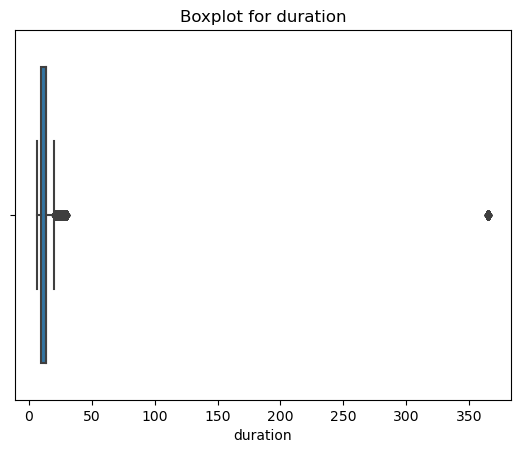

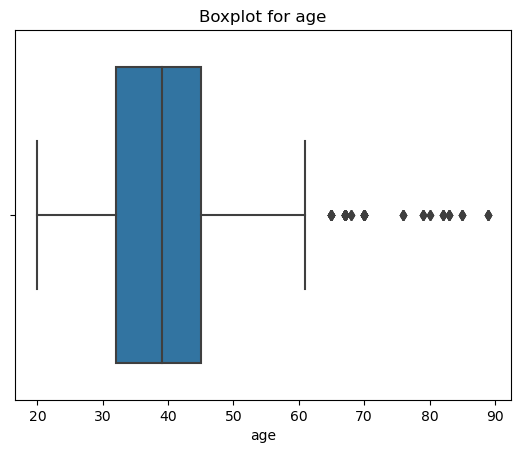

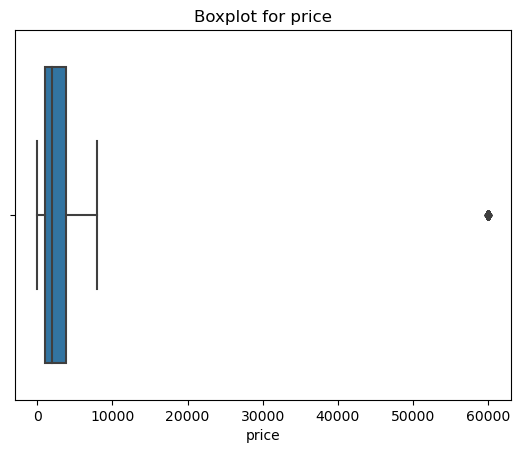

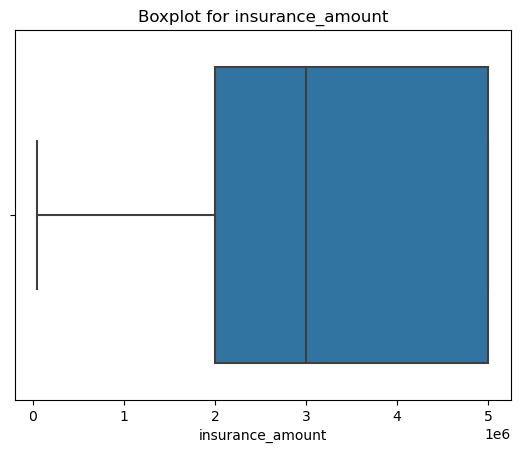

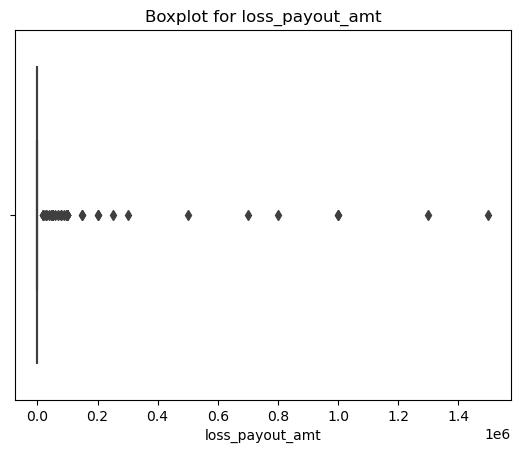

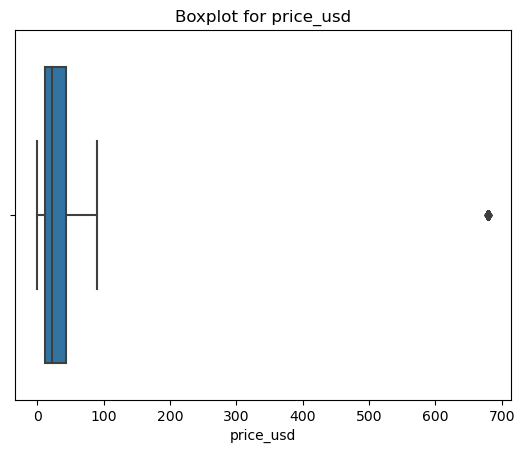

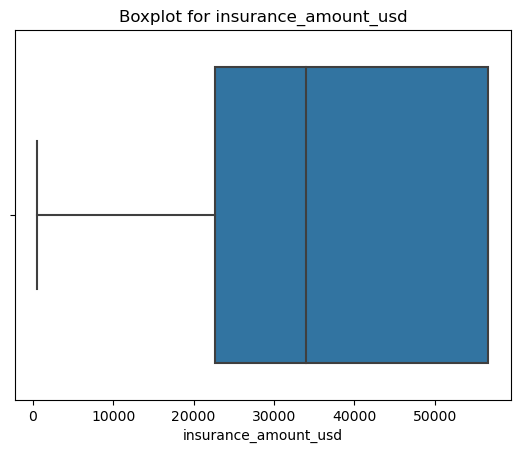

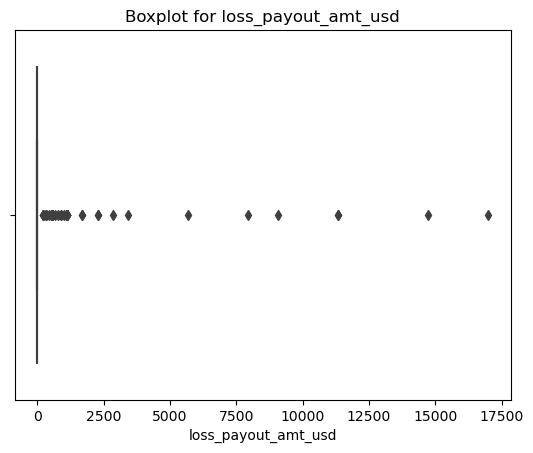

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in quant:
    plt.figure()  # Создание нового графика
    sns.boxplot(x=i, data=df)  # Построение boxplot для переменной i
    plt.title('Boxplot for ' + i)  # Установка заголовка для графика
    plt.show()  # Показать график

In [2]:
df = pd.read_excel('df_fin.xlsx', index_col=0)
df

,contract_status,currency_name,duration,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,...,country_Казахстан,country_Канада,country_ОАЭ,country_США,country_Сирия,country_Таиланд,country_Турция,country_Узбекистан,country_Франция,ouliers
0,0,1,10,20,1,1096,2000000,0,12.41768,22660.0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,7,55,1,1918,5000000,0,21.73094,56650.0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,10,61,0,1096,2000000,0,12.41768,22660.0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,14,25,1,1534,2000000,0,17.38022,22660.0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,7,33,1,1918,5000000,0,21.73094,56650.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,0,1,15,22,0,2466,3000000,0,27.93978,33990.0,...,0,0,0,0,0,0,1,0,0,1
3707,0,1,7,33,1,1918,5000000,0,21.73094,56650.0,...,0,0,0,0,0,0,0,0,0,1
3708,0,1,15,43,1,2466,3000000,0,27.93978,33990.0,...,0,0,0,0,0,0,1,0,0,-1
3709,0,1,30,29,1,4932,3000000,0,55.87956,33990.0,...,0,0,0,0,0,0,1,0,0,-1


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f, chisquare
from sklearn.feature_selection import f_regression, mutual_info_regression, chi2, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from genetic_selection import GeneticSelectionCV

In [10]:
def compute_impurity(feature, impurity_criterion):
    """
    This function calculates impurity of a feature.
    Supported impurity criteria: 'entropy', 'gini'
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)
    
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')
        
    return(round(impurity, 3))


def comp_feature_information_gain(df, target, descriptive_feature, split_criterion):
    """
    This function calculates information gain for splitting on 
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy', 'gini'
    """

    print('target feature:', target)
    print('descriptive_feature:', descriptive_feature)
    print('split criterion:', split_criterion)
            
    target_entropy = compute_impurity(df[target], split_criterion)

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

#     print('impurity of partitions:', entropy_list)
#     print('weights of partitions:', weight_list)

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    print('remaining impurity:', feature_remaining_impurity)
    
    information_gain = target_entropy - feature_remaining_impurity
    print('information gain:', information_gain)
    
    print('====================')

    return(information_gain)

In [11]:
split_criterion = 'entropy'
for feature in df.drop(columns='age').columns:
    feature_info_gain = comp_feature_information_gain(df, 'age', feature, split_criterion)

target feature: age
descriptive_feature: contract_status
split criterion: entropy
remaining impurity: 5.059489999999999
information gain: 0.01751000000000058
target feature: age
descriptive_feature: currency_name
split criterion: entropy
remaining impurity: 5.062832
information gain: 0.014167999999999736
target feature: age
descriptive_feature: duration
split criterion: entropy
remaining impurity: 4.8441670000000006
information gain: 0.2328329999999994
target feature: age
descriptive_feature: sex
split criterion: entropy
remaining impurity: 5.017554
information gain: 0.05944600000000033
target feature: age
descriptive_feature: price
split criterion: entropy
remaining impurity: 4.725688000000002
information gain: 0.3513119999999983
target feature: age
descriptive_feature: insurance_amount
split criterion: entropy
remaining impurity: 5.021025000000001
information gain: 0.05597499999999922
target feature: age
descriptive_feature: loss_payout_amt
split criterion: entropy
remaining impurity

In [14]:
mi = mutual_info_regression(df.drop(columns=["age"]), df.age)

In [16]:
np.argmax(mi), mi[np.argmax(mi)], df.drop(columns=["age"]).columns[np.argmax(mi)]

(30, 0.05295882965594645, 'ouliers')

In [17]:
reg = LinearRegression()
sfs = SequentialFeatureSelector(reg, n_features_to_select=3)
sfs.fit(df.drop(columns=["age"]), df.age)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=3)

In [18]:
sfs.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True])

In [19]:
reg = LinearRegression()
sfs = SequentialFeatureSelector(reg, n_features_to_select=3, direction="backward")
sfs.fit(df.drop(columns=["age"]), df.age)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=3)

In [20]:
sfs.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True])

In [21]:
df_training = df.drop(columns=["age"])

for column in df_training.columns:
    if df_training[column].dtype == "float64":
        df_training[column]=pd.to_numeric(df_training[column], downcast="float")
    if df_training[column].dtype == "int64":
        df_training[column]=pd.to_numeric(df_training[column], downcast="integer")
    if df_training[column].dtype == "int32":
        df_training[column]=pd.to_numeric(df_training[column], downcast="integer")

In [1]:
pip install upgrade sklearn-genetic

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [ ]:
 x = df_training

 estimators = DecisionTreeRegressor()
 models = GeneticSelectionCV(
     estimators, cv=5, verbose=0,
     scoring="neg_mean_squared_error", max_features=5,
     n_population=100, crossover_proba=0.5,
     mutation_proba=0.2, n_generations=50,
     crossover_independent_proba=0.5,
     mutation_independent_proba=0.04,
     tournament_size=3, n_gen_no_change=10,
     caching=True, n_jobs=-1)
 models = models.fit(df.drop(columns='age'), df.age)
 print('Feature Selection:', x.columns[models.support_])